In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor # Random forest regressor 
from sklearn.model_selection import train_test_split # splitting dataset into te"
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv('/content/Salary_Data.csv')

In [3]:
df.shape #shape of the dataset

(30, 3)

In [4]:
df.head() #first five rows of the dataset

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [5]:
df.info() #Details about the datatypes in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Age              30 non-null     float64
 2   Salary           30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [6]:
df.isnull().sum() #checks for null values in the dataset by taking their sum

YearsExperience    0
Age                0
Salary             0
dtype: int64

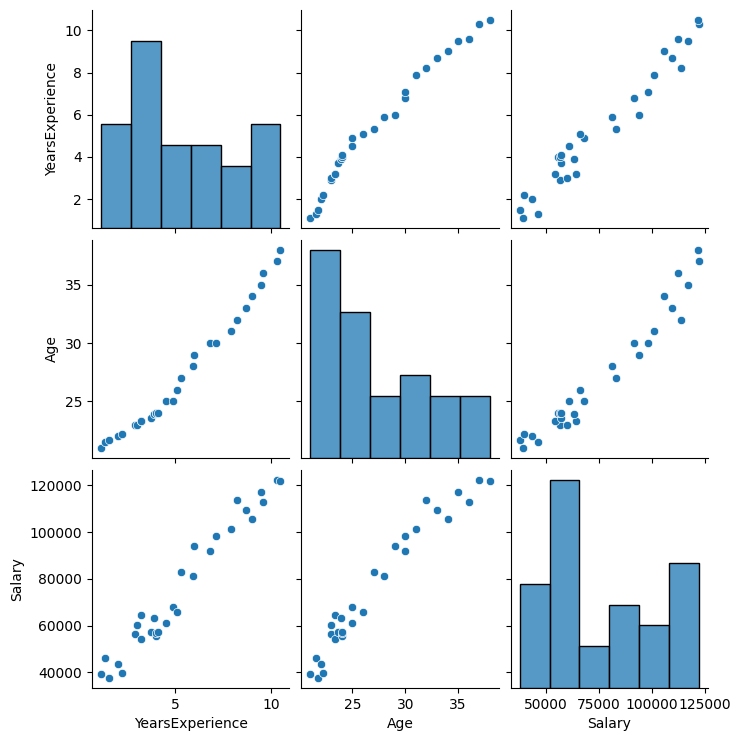

In [7]:
sns.pairplot(df)

<Axes: >

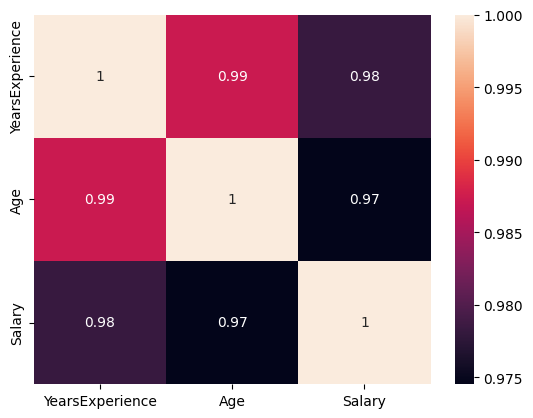

In [8]:
corr=df.corr() #correlation heatmap in seaborn library
sns.heatmap(corr,annot=True)

In [9]:
from sklearn.ensemble import RandomForestRegressor # Random forest regressor 
from sklearn.model_selection import train_test_split # splitting dataset into test and train
from sklearn.metrics import mean_squared_error # to find accuracy of prediction

In [10]:
# Split the dataset into features and target
X = df.drop(['Salary'], axis=1)
y = df['Salary']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18, 2) (12, 2) (18,) (12,)


In [13]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse',metrics=['mae'])

In [16]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)


In [17]:
loss, mse = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('MAE:', mse)

1/1 [==============================] - 0s 51ms/step - loss: 33262698.0000 - mae: 4877.9067
Loss: 33262698.0
MAE: 4877.90673828125


In [18]:
train_pred = model.predict(X_train)

1/1 [==============================] - 0s 183ms/step


In [19]:
test_pred = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [20]:
y_pred = model.predict(X_test)


1/1 [==============================] - 0s 44ms/step


In [21]:
r2 = r2_score(y_test, test_pred)
print('R-squared:', r2)

R-squared: 0.9589206329195142


In [22]:

from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, train_pred)
accuracy_train = 1 - mse_train / y_train.var()

mse_test = mean_squared_error(y_test, test_pred)
accuracy_test = 1 - mse_test / y_test.var()

print("Accuracy on training set:", accuracy_train)
print("Accuracy on testing set:", accuracy_test)


Accuracy on training set: 0.9685053772051287
Accuracy on testing set: 0.9623439135095547


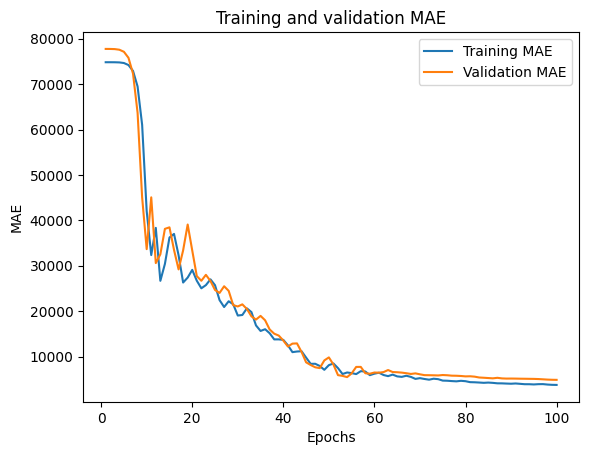

In [23]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy
train_acc = history.history['mae']
val_acc = history.history['val_mae']

# Get the number of epochs
epochs = range(1, len(train_acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_acc, label='Training MAE')
plt.plot(epochs, val_acc, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


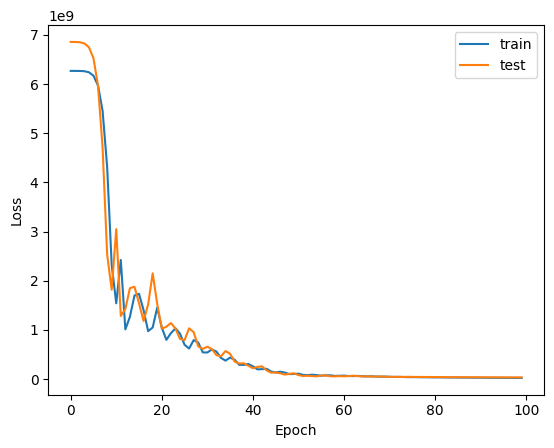

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()